In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100, size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

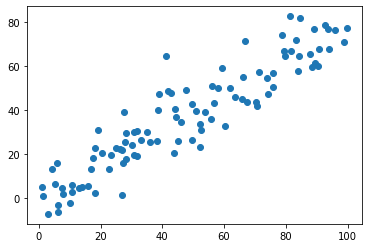

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

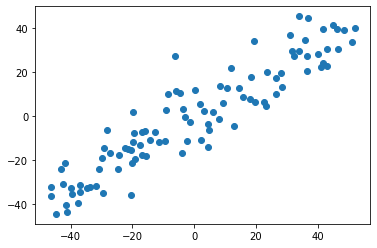

In [5]:
X_demean = demean(X)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [6]:
print(np.mean(X_demean[:,0]))
print(np.mean(X_demean[:,1]))

-2.1316282072803005e-15
8.597567102697212e-15


### 梯度上升法

In [7]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [8]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [9]:
def df_debug(w, X, epsilon=1e-4):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [10]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w += w + eta * gradient
        w = direction(initial_w)  # 注意1：每次求一个单位方向
        
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        
        cur_iter += 1
        
    return w

In [11]:
initial_w = np.random.random(X.shape[1])  # 注意2：不能用0向量开始
eta = 1e3

In [12]:
# 注意3：不能使用StandardScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.72929128, 0.68420336])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.72929128, 0.68420336])

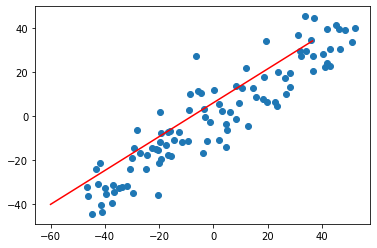

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([-60, w[0]*50], [-40, w[1]*50], color='r')
plt.show()

### 利用极端的方法进行验证

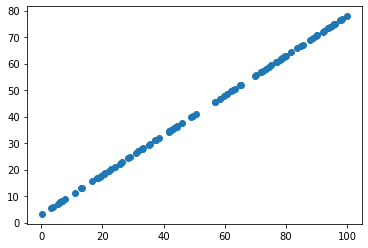

In [15]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100, size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.
plt.scatter(X2[:,0], X2[:,1])
plt.show()

[0.72929128 0.68420336]


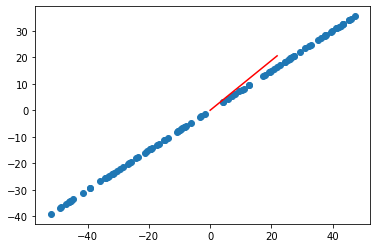

In [16]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
print(w2)
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()